# COMPARISON WITH SKLEARN

In [3]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import roc_auc_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from nn import NN, Layer
from project1_lib import make_franke_vecs
import numpy as np
import time

Reading the data

In [4]:
data, target = make_franke_vecs(0, 20)
target = np.expand_dims(target, axis=1)
sc = StandardScaler()
data = sc.fit_transform(data)

Setting up the neural network (self made)

In [5]:
l1 = Layer(data.shape[1], 20,activation_function= "sigmoid")
l2 = Layer(20, 10, activation_function = "sigmoid")
l3 = Layer(10,5,activation_function = "sigmoid")
l4 = Layer(5,1,activation_function = None)

#Setting up the nerual network and adds each layer.
nnet = NN(cost_function="mse")
nnet.add_layer(l1)
nnet.add_layer(l2)
nnet.add_layer(l3)
nnet.add_layer(l4)

Finding the time and the training MSE for the self made version. 

In [6]:
start_time = time.time()
nnet.train(data, target,500, 50, 0.001, 0.1)
end_time = time.time()
y_pred = nnet.predict(data)
# print(y_pred)
print(end_time-start_time)
print("MSE self made NN: ", mean_squared_error(y_pred, target) )

1.2053158283233643
MSE self made NN:  0.020240104307119436


Finding the time for for fitting the network and the training MSE for sklearn's neural network. 

In [7]:
nnet_sklearn = MLPRegressor(hidden_layer_sizes=(20, 10, 5), activation = "logistic", solver = "sgd", batch_size = 50, alpha = 0.1, learning_rate_init= 0.001, max_iter = 500)
start_time_sklearn = time.time()
nnet_sklearn.fit(data, np.ravel(target))
end_time_sklearn= time.time()
y_pred_sklearn = nnet_sklearn.predict(data)

# print(y_pred_sklearn)
print(end_time_sklearn - start_time_sklearn)
print("MSE sklearn NN: ", mean_squared_error(y_pred_sklearn, target) )


0.07982444763183594
MSE sklearn NN:  0.08151659395465805


Using sigmoid/logistic activation functions with sklearn leads to worse results. However, the time it takes to fit the model is much faster. By using relu in all layers of sklearn's network, we will see that we get similar results to wha we obtained using the self made neural network. 

In [8]:
nnet_sklearn = MLPRegressor(hidden_layer_sizes=(20, 10, 5), activation = "relu", solver = "sgd", batch_size = 50, alpha = 0.1, learning_rate_init= 0.001, max_iter = 500)
start_time_sklearn = time.time()
nnet_sklearn.fit(data, np.ravel(target))
end_time_sklearn= time.time()
y_pred_sklearn = nnet_sklearn.predict(data)

# print(y_pred_sklearn)
print(end_time_sklearn - start_time_sklearn)
print("MSE sklearn NN: ", mean_squared_error(y_pred_sklearn, target) )

0.36605334281921387
MSE sklearn NN:  0.023627014210039723


The MSE are now much closer to the self made version. It uses a bit more time to fit the model with relu instead of sigmoid. 

# We can also time the code as a function of number of neurons in the hidden layers in the model. I will start with 10, and then increase them 10 by 10 up till 200. 

We see that sklearn implementation is faster by a lot. 

10
20
30
40
50
60
70
80
90
100


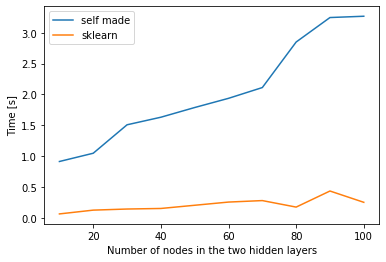

In [8]:
import matplotlib.pyplot as plt 

time_self_made = []
time_sklearn = []

nodes_in_each_layer = [10,20,30,40,50,60,70,80,90,100]

data, target = make_franke_vecs(0, 20)
target = np.expand_dims(target, axis=1)
sc = StandardScaler()
data = sc.fit_transform(data)

for nodes in nodes_in_each_layer:
    print(nodes)
    
    nnet = NN(cost_function="mse")
    first_layer = Layer(data.shape[1], nodes,activation_function= "sigmoid")
    added_layer = Layer(nodes,nodes, activation_function = "sigmoid")
    added_layer2 = Layer(nodes,1, activation_function = "sigmoid")
    nnet.add_layer(first_layer)
    nnet.add_layer(added_layer)
    nnet.add_layer(added_layer2)
    start_time = time.time()
    nnet.train(data, target,500, 50, 0.001, 0.1)
    end_time = time.time()
    
    time_self_made.append(end_time - start_time)
    
    nnet_sklearn = MLPRegressor(hidden_layer_sizes=(nodes, nodes), activation = "relu", solver = "sgd", batch_size = 50, alpha = 0.1, learning_rate_init= 0.001, max_iter = 500)

    start_time_sklearn = time.time()
    nnet_sklearn.fit(data, np.ravel(target))
    end_time_sklearn= time.time()
    
    time_sklearn.append(end_time_sklearn - start_time_sklearn)


plt.plot(nodes_in_each_layer, time_self_made)
plt.plot(nodes_in_each_layer, time_sklearn)
plt.xlabel("Number of nodes in the two hidden layers")
plt.ylabel("Time [s]")
plt.legend(["self made", "sklearn"])
plt.show()

In [6]:
data, target = make_franke_vecs(0, 20)
target = np.expand_dims(target, axis=1)
sc = StandardScaler()
data = sc.fit_transform(data)
nnet_sklearn = MLPRegressor(hidden_layer_sizes=(20, 10), activation = "logistic", verbose= True, solver = "sgd", batch_size = 50, alpha = 0.1, learning_rate_init= 0.001, max_iter = 500)
nnet_sklearn.fit(data, np.ravel(target))


Iteration 1, loss = 0.11173676
Iteration 2, loss = 0.09127662
Iteration 3, loss = 0.07142316
Iteration 4, loss = 0.05818371
Iteration 5, loss = 0.05166251
Iteration 6, loss = 0.04830381
Iteration 7, loss = 0.04714000
Iteration 8, loss = 0.04659904
Iteration 9, loss = 0.04642981
Iteration 10, loss = 0.04641469
Iteration 11, loss = 0.04640583
Iteration 12, loss = 0.04639787
Iteration 13, loss = 0.04640686
Iteration 14, loss = 0.04638342
Iteration 15, loss = 0.04637923
Iteration 16, loss = 0.04636986
Iteration 17, loss = 0.04635726
Iteration 18, loss = 0.04634761
Iteration 19, loss = 0.04633768
Iteration 20, loss = 0.04633883
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPRegressor(activation='logistic', alpha=0.1, batch_size=50, beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(20, 10), learning_rate='constant',
             learning_rate_init=0.001, max_iter=500, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='sgd', tol=0.0001,
             validation_fraction=0.1, verbose=True, warm_start=False)

From the optimal values from part d, we see that the we actually obtained slightly better results using our model. However, this is for one single run but our algorithm seems to be working properly. 